In [1]:
!pip install numpy pandas matplotlib scikit-learn &> /dev/null

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from PIL import Image

# Problem 1

In [3]:
X, y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.6, random_state=0)

Display the clusters

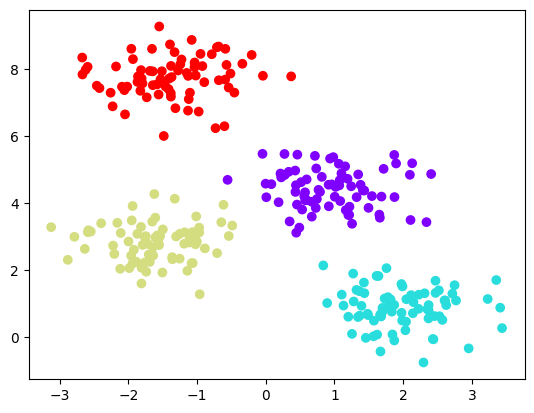

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')

### K-means clustering

In [5]:
class KMeans:
    def __init__(self, n_clusters, n_features):
        self.n_clusters = n_clusters
        self.n_features = n_features
    
    def distances(self, X):
        assert X.shape[1] == self.n_features
        distances = []
        for centroid in self.centroids:
            distances.append(np.linalg.norm(X - centroid, axis=1))
        return np.array(distances)
    
    def initializeRandomCentroids(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
    def initializeKMeansPlusPlusCentroids(self, X):
        self.centroids = np.zeros((self.n_clusters, self.n_features))
        self.centroids[0] = X[np.random.choice(X.shape[0], 1, replace=False)]
        for i in range(1, self.n_clusters):
            distances = []
            for centroid in self.centroids[:i]:
                distances.append(np.linalg.norm(X - centroid, axis=1))
            distances = np.array(distances)
            distances = np.min(distances, axis=0)
            distances = distances / np.sum(distances)
            self.centroids[i] = X[np.random.choice(X.shape[0], 1, replace=False, p=distances)]     
    
    def whichCluster(self, X):
        distances = self.distances(X)
        return np.argmin(distances, axis=0)
    
    def updateCluster(self, X):
        clusters = self.whichCluster(X)
        for i in range(self.n_clusters):
            self.centroids[i] = np.mean(X[clusters == i], axis=0)
    
    def fit(self, X, epochs=500, seed=None, kmeansPlusPlus=False):
        if seed is not None:
            np.random.seed(seed)
        else:
            np.random.seed(np.random.randint(0, 1000))
        if kmeansPlusPlus:
            self.initializeKMeansPlusPlusCentroids(X)
        else:
            self.initializeRandomCentroids(X)
        for _ in range(epochs):
            self.updateCluster(X)
    
    def predict(self, X):
        return self.whichCluster(X)
    
    def plot(self, X):
        clusters = self.whichCluster(X)
        plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')
        plt.scatter(self.centroids[:,0], self.centroids[:,1], c='black', s=100, alpha=0.5)

#### K-Means with default seed

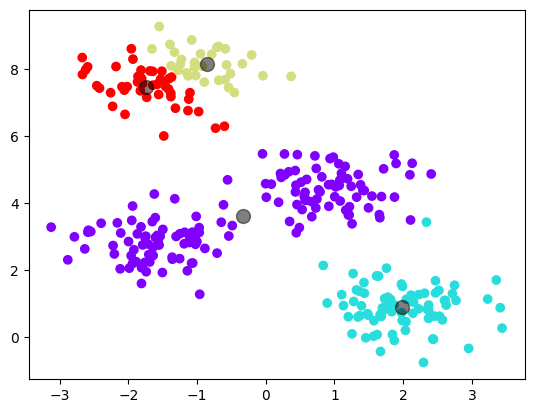

In [6]:
kmeans = KMeans(n_clusters=4, n_features=2)
kmeans.fit(X)   
kmeans.plot(X)

In [7]:
labels = kmeans.predict(X)
print("Centers: ", kmeans.centroids)

Centers:  [[-0.33514647  3.62624134]
 [ 1.98726097  0.90144281]
 [-0.85818041  8.16999589]
 [-1.73612968  7.46038138]]


#### K-Means with seed=2

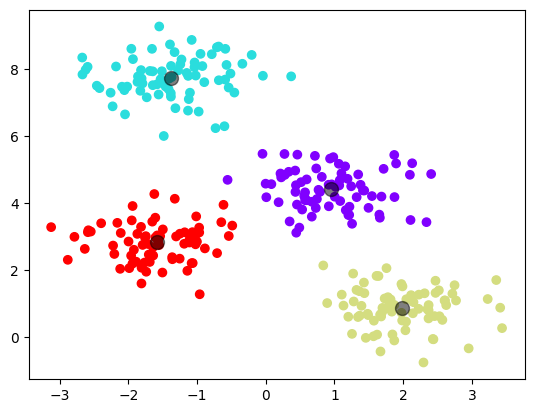

In [8]:
kmeans = KMeans(n_clusters=4, n_features=2)
kmeans.fit(X, seed=2)  
kmeans.plot(X)

In [9]:
labels = kmeans.predict(X)
print("Centers: ", kmeans.centroids)

Centers:  [[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]]


#### Observations
1. The clusters are different for different seeds
2. With seed=2, the clusters are more accurate than the default seed
3. The default seed may or may not give the best clusters

### K-Means++

#### K-Means++ with default seed

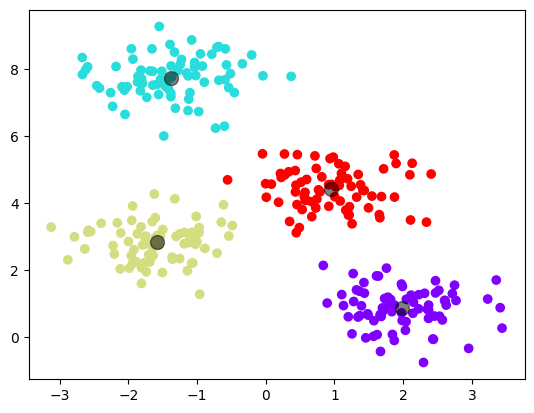

In [10]:
kmeansPlusPlus = KMeans(n_clusters=4, n_features=2)
kmeansPlusPlus.fit(X, kmeansPlusPlus=True)
kmeansPlusPlus.plot(X)

In [11]:
labels = kmeansPlusPlus.predict(X)
print("Centers: ", kmeansPlusPlus.centroids)

Centers:  [[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


#### K-Means++ with seed=2

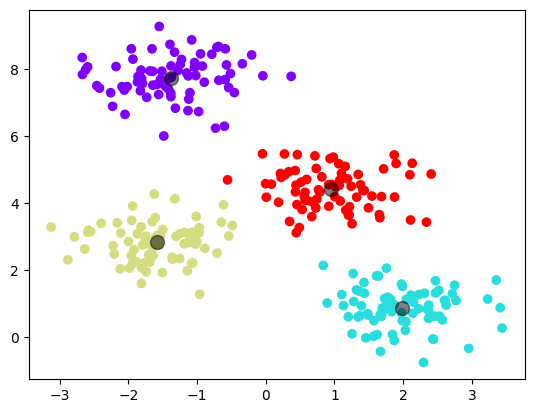

In [12]:
kmeansPlusPlus = KMeans(n_clusters=4, n_features=2)
kmeansPlusPlus.fit(X, seed=2, kmeansPlusPlus=True)
kmeansPlusPlus.plot(X)

In [13]:
labels = kmeansPlusPlus.predict(X)
print("Centers: ", kmeansPlusPlus.centroids)

Centers:  [[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


#### Observations
1. Seeding doesn't seem to affect the clusters much in K-Means++. In very few cases, the clusters are different.
2. The centroids seem to stabilize in K-Means++ faster.

### K-Means++ for image compression

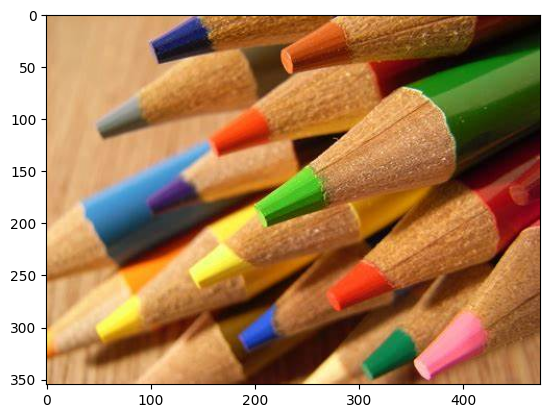

In [14]:
image = Image.open('OIP.jpeg')

imageArray = np.array(image)
height, width, channels = imageArray.shape

flattenedImageArray = imageArray.reshape(height * width, channels)
plt.imshow(imageArray)

In [15]:
kmeansPlusPlus = KMeans(n_clusters=16, n_features=channels)
kmeansPlusPlus.fit(flattenedImageArray, kmeansPlusPlus=True)

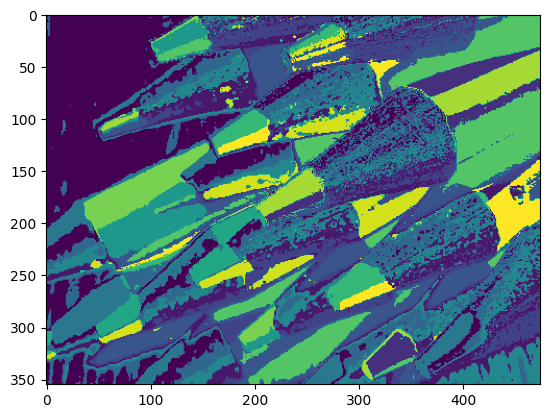

In [16]:
newImageArray = kmeansPlusPlus.predict(flattenedImageArray)
newImageArray = newImageArray.reshape(height, width)

plt.imshow(newImageArray)

#### Overall observations
1. K-Means++ and K-Means with seed=2 have very similar results
2. K-Means with default seed has a different result and is not as good as the others. The result fluctuates a lot and is not as stable as the others.
3. K-Means++ seem to perform better than K-Means in general.
4. For the image compression, K-Means++ with 16 clusters seems to be the best, in terms of time and quality of the compressed image.

# Problem 2

In [17]:
data = np.array([[1, 1, 1, 0, 0],
                [3, 3, 3, 0, 0],
                [4, 4, 4, 0, 0],
                [5, 5, 5, 0, 0],
                [0, 2, 0, 4, 4],
                [0, 0, 0, 5, 5],
                [0, 1, 0, 2, 2]])

Text(0.5, 0, 'Rating')

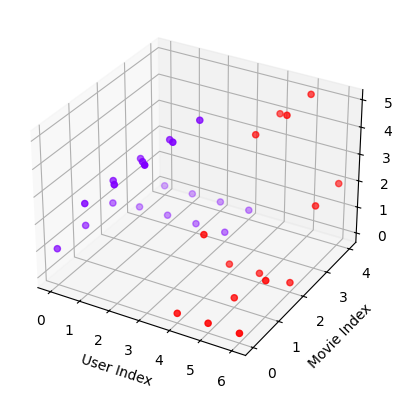

In [18]:
ThreeDData = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if i < 4:
            ThreeDData.append([i, j, data[i][j], 0])
        else:
            ThreeDData.append([i, j, data[i][j], 1])
# The fourth column is whether the point corresponds to sci-fi or romance
ThreeDData = np.array(ThreeDData)

# Plotting the 3D data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(ThreeDData[:,0], ThreeDData[:,1], ThreeDData[:,2], c=ThreeDData[:,3], cmap='rainbow')
ax.set_xlabel('User Index')
ax.set_ylabel('Movie Index')
ax.set_zlabel('Rating')



In [19]:
def centerData(data):
    return data - np.mean(data, axis=0)

In [20]:
data = centerData(data)

#### SVD Solution (1)

K:  1 , Variance Captured:  0.8562752663894276
K:  2 , Variance Captured:  0.9863627052286568
K:  3 , Variance Captured:  1.0
K:  4 , Variance Captured:  1.0
K:  5 , Variance Captured:  1.0


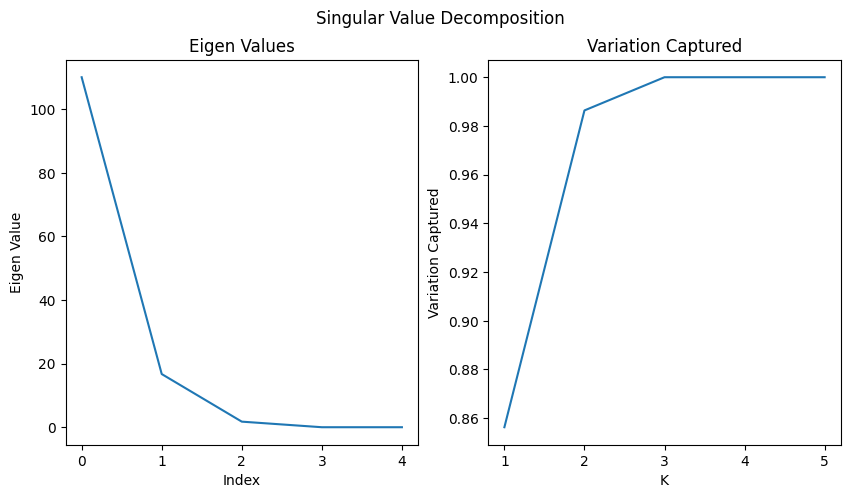

In [21]:
def SolutionOne(data):
    u, s, v = np.linalg.svd(data)

    eigenValues = s ** 2
    eigenValuesAsPercentage = eigenValues / np.sum(eigenValues)

    for i in range(len(eigenValuesAsPercentage)):
        print("K: ", i + 1, ", Variance Captured: ", np.sum(eigenValuesAsPercentage[:i + 1]))
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle('Singular Value Decomposition')
    
    axs[0].plot(eigenValues)
    axs[0].set_title('Eigen Values')
    axs[0].set_xlabel('Index')
    axs[0].set_ylabel('Eigen Value')
    
    cumulativeSum = np.cumsum(eigenValuesAsPercentage)
    axs[1].plot(list(range(1, len(eigenValuesAsPercentage) + 1)), cumulativeSum) 
    axs[1].set_title('Variation Captured')
    axs[1].set_xlabel('K')
    axs[1].set_ylabel('Variation Captured')
    
    plt.show()
        
    return u, s, v

_, s_svd, v_svd = SolutionOne(data)

I am choosing k = 2 as it covers 98% of the variance in the data and reduces the dimensionality to 2.

Text(0, 0.5, 'Dimension 2')

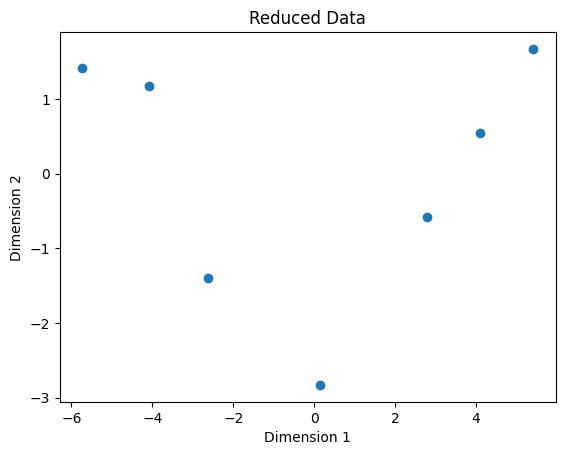

In [22]:
k = 2
v_reduced = v_svd[:k, :]

data_reduced = data @ v_reduced.T

plt.scatter(data_reduced[:,0], data_reduced[:,1])
plt.title('Reduced Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

### Solution 2

In [23]:
def SolutionTwo(data):
    covarianceMatrix = np.cov(data.T)

    eigenValues_, eigenVectors_ = np.linalg.eig(covarianceMatrix)

    # Order in descending order
    idx = eigenValues_.argsort()[::-1]
    eigenValues_ = eigenValues_[idx]
    eigenVectors_ = eigenVectors_[:, idx]
    
    eigenValues_ = np.real(eigenValues_)
    eigenVectors_ = np.real(eigenVectors_)
    eigenValuesAsPercentage_ = eigenValues_ / np.sum(eigenValues_)
    
    for i in range(len(eigenValuesAsPercentage_)):
        print("K: ", i + 1, ", Variance Captured: ", np.sum(eigenValuesAsPercentage_[:i + 1]))
        
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle('Eigen Value Decomposition')
    
    axs[0].plot(eigenValues_)
    axs[0].set_title('Eigen Values')
    axs[0].set_xlabel('Index')
    axs[0].set_ylabel('Eigen Value')
    
    cumulativeSum = np.cumsum(eigenValuesAsPercentage_)
    axs[1].plot(list(range(1, len(eigenValuesAsPercentage_) + 1)), cumulativeSum)
    axs[1].set_title('Variation Captured')
    axs[1].set_xlabel('K')
    axs[1].set_ylabel('Variation Captured')
    
    return eigenValues_, eigenVectors_

K:  1 , Variance Captured:  0.8562752663894279
K:  2 , Variance Captured:  0.9863627052286569
K:  3 , Variance Captured:  1.0
K:  4 , Variance Captured:  1.0
K:  5 , Variance Captured:  1.0


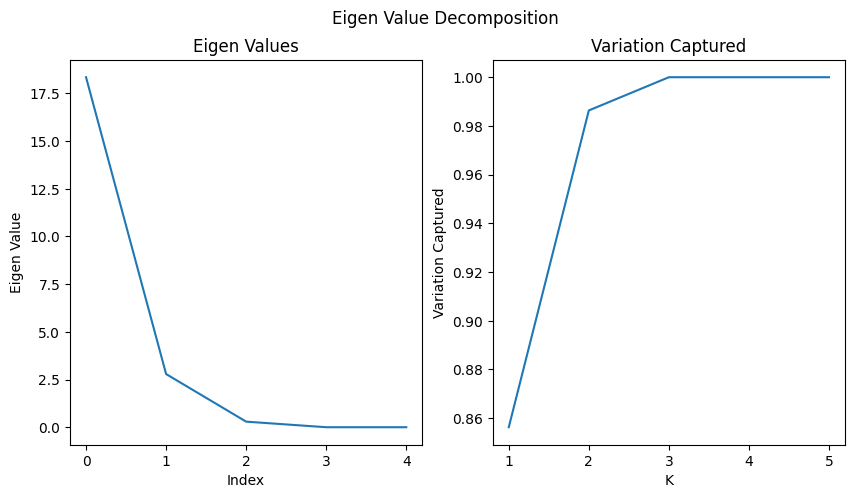

In [24]:
eigenValuesSolutionTwo, eigenVectorsSolutionTwo = SolutionTwo(data)

I am choosing k = 2 as it covers 98% of the variance in the data and reduces the dimensionality to 2.

Text(0, 0.5, 'Dimension 2')

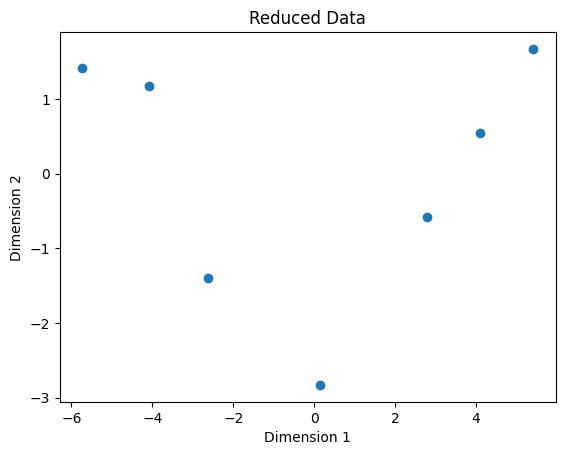

In [25]:
k = 2
data_reduced = np.dot(data, eigenVectorsSolutionTwo[:, :k])

# Plot the reduced 2D data
plt.scatter(data_reduced[:,0], data_reduced[:,1])
plt.title('Reduced Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Eigenvectors (V) (Rounded to 2 decimal places)

In [26]:
print(np.round(eigenVectorsSolutionTwo, 2))

[[ 0.47  0.36  0.39  0.02 -0.71]
 [ 0.37  0.41 -0.83 -0.    0.  ]
 [ 0.47  0.36  0.39 -0.02  0.71]
 [-0.46  0.54  0.06 -0.71 -0.  ]
 [-0.46  0.54  0.06  0.71 -0.  ]]


Eigenvalues (D) (Rounded to 2 decimal places)

In [27]:
print(np.round(np.diag(eigenValuesSolutionTwo), 2))

[[18.35  0.    0.    0.    0.  ]
 [ 0.    2.79  0.    0.    0.  ]
 [ 0.    0.    0.29  0.    0.  ]
 [ 0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.  ]]


# Problem 3

In [28]:
from sklearn.datasets import fetch_lfw_people

In [29]:
lfw_people = fetch_lfw_people(min_faces_per_person=70)

#### Display the 4th image

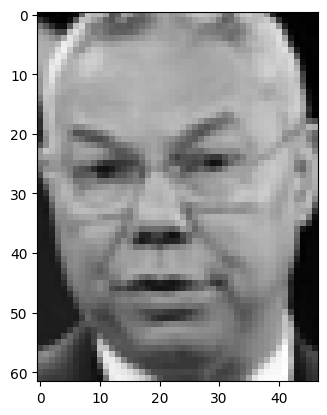

In [30]:
# Display the 4th image
plt.imshow(lfw_people.data[3].reshape(62, 47), cmap='gray')

#### Mean of all the images

In [31]:
allImagesMean = np.mean(lfw_people.data, axis=0)
allImagesMean

array([0.35369185, 0.36522245, 0.38784847, ..., 0.45257366, 0.426224  ,
       0.40011668], dtype=float32)

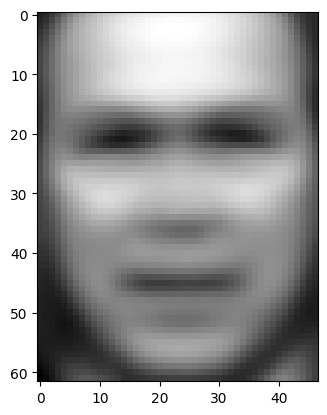

In [32]:
plt.imshow(allImagesMean.reshape(62, 47), cmap='gray')

### Dimensionality reduction

In [33]:
X = lfw_people.data - allImagesMean
covarianceMatrix = np.cov(X.T)
eigenValues, eigenVectors = np.linalg.eig(covarianceMatrix)

# Order in descending order
idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]

eigenValues = np.real(eigenValues)
eigenVectors = np.real(eigenVectors)


#### Using K = 5

In [34]:
K = 5
eigenValuesK5 = eigenValues[:K]
eigenVectorsK5 = eigenVectors[:, :K]

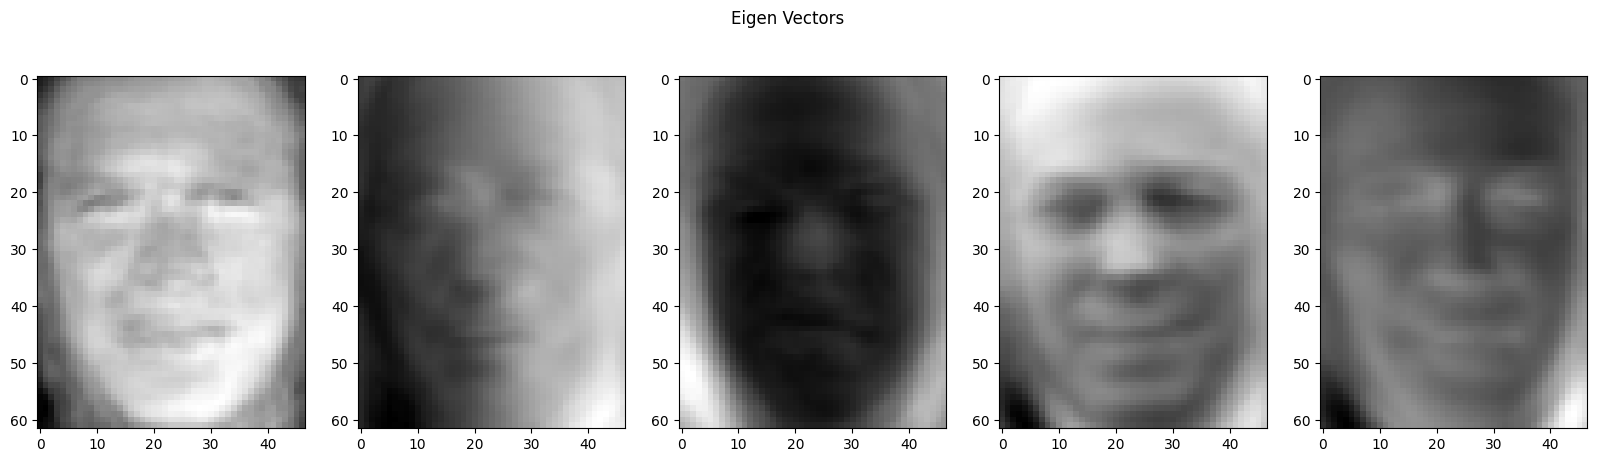

In [35]:
# Print the top 5 eigen vectors
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Eigen Vectors')
for i in range(5):
    axs[i].imshow(eigenVectorsK5[:, i].reshape(62, 47), cmap='gray')

#### Reconstructing the image

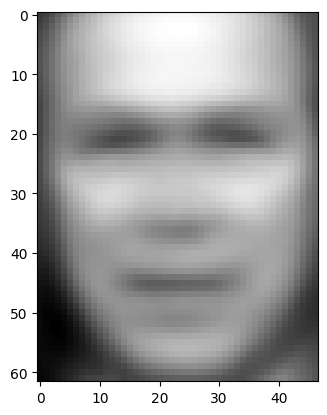

In [36]:
X_reduced = np.dot(X, eigenVectorsK5)

# Reconstruct the image
X_reconstructed = np.dot(X_reduced, eigenVectorsK5.T) + allImagesMean
plt.imshow(X_reconstructed[3].reshape(62, 47), cmap='gray')

#### Using K = 50

In [37]:
K = 50
eigenValuesK50 = eigenValues[:K]
eigenVectorsK50 = eigenVectors[:, :K]

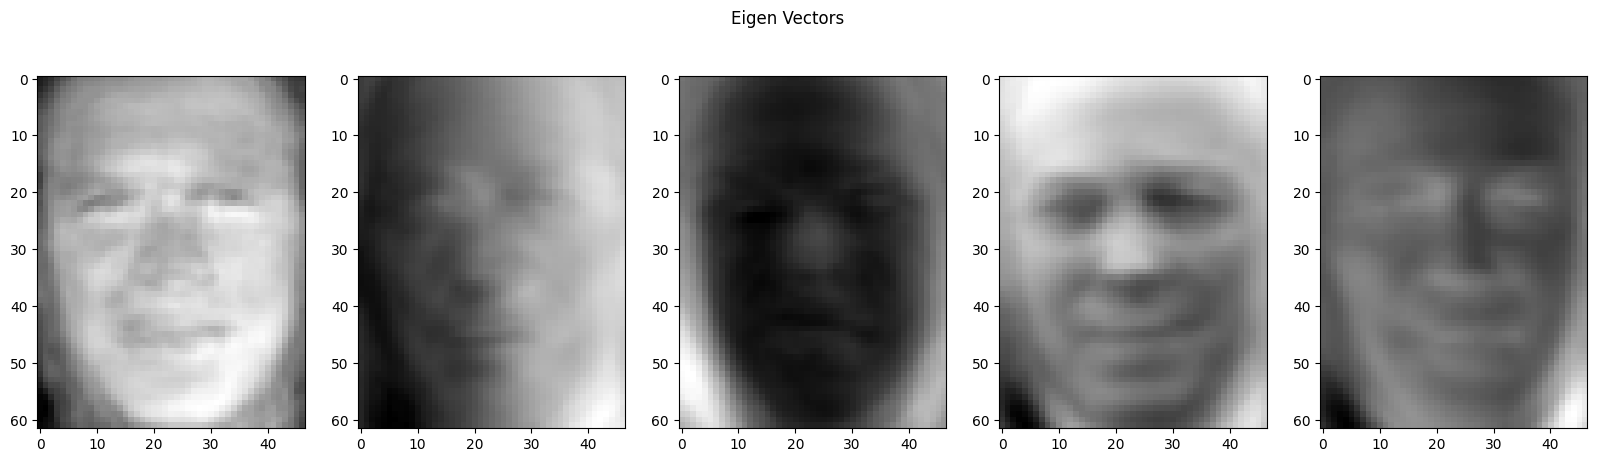

In [38]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Eigen Vectors')
for i in range(5):
    axs[i].imshow(eigenVectorsK50[:, i].reshape(62, 47), cmap='gray')

#### Reconstructing the image

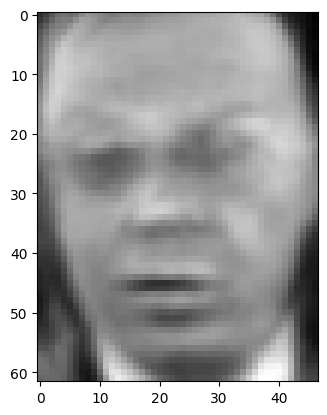

In [39]:
X_reduced = np.dot(X, eigenVectorsK50)

# Reconstruct the image
X_reconstructed = np.dot(X_reduced, eigenVectorsK50.T) + allImagesMean
plt.imshow(X_reconstructed[3].reshape(62, 47), cmap='gray')